In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import pandas as pd
import graph_tool as gt
from tqdm import tqdm
from operator import itemgetter
from functools import reduce
import itertools
#from pymnet import *

import MuxVizPy as mxp

import gseapy

import warnings
warnings.filterwarnings("ignore")

CUT_THR = 0.7

#virus metadata
virus_metadata = pd.read_csv("Files/viruses_metadata.csv", header=0, sep=";")

#dictionary containing a unquie mapping between name of the protein and a corresponding index
node_map_df = pd.read_csv("Files/node_map.csv")
node_map_dict = {k:(v-1) for k,v in zip(node_map_df["Prot"], node_map_df["Index"])}

# VIRUS STATISTICS

In [168]:
virus_nodes0_list, virus_nodes1_list = [], []
virus_nodes0_dict, virus_nodes1_dict ={}, {}
target_folder = "Virus_data_Enriched_"+str(CUT_THR)+"_Neigh_0"+"/"

neigh0_indexes = virus_metadata[virus_metadata["neigh_order"]==0].index.values
for i, vi in enumerate(neigh0_indexes):
    read_nodes = pd.read_csv(target_folder+"/"+virus_metadata.loc[vi,"virus"]+"/nodes.csv")
    virus_nodes0 = list(read_nodes[read_nodes["type"]==0].node)
    np.savetxt(X=virus_nodes0, fname="Virus_data_Enriched_0.7_Neigh_0/"+virus_metadata.loc[vi,"virus"]+"/type0nodes.txt", fmt="%s")
    virus_nodes1 = list(read_nodes[read_nodes["type"]==1].node)
    np.savetxt(X=virus_nodes1, fname="Virus_data_Enriched_0.7_Neigh_0/"+virus_metadata.loc[vi,"virus"]+"/type1nodes.txt", fmt="%s")
    
    virus_nodes0_list.append(virus_nodes0)
    virus_nodes0_dict[virus_metadata.loc[vi,"virus"]] = virus_nodes0
    
    virus_nodes1_list.append(virus_nodes1)
    virus_nodes1_dict[virus_metadata.loc[vi,"virus"]] = virus_nodes1

In [169]:
virus_nodes2_list = []
virus_nodes2_dict ={}
target_folder = "Virus_data_Enriched_"+str(CUT_THR)+"_Neigh_1"+"/"

neigh2_indexes = virus_metadata[virus_metadata["neigh_order"]==1].index.values
for i, vi in enumerate(neigh2_indexes):
    read_nodes = pd.read_csv(target_folder+"/"+virus_metadata.loc[vi,"virus"]+"/nodes.csv")
    virus_nodes2 = list(read_nodes[read_nodes["type"]==2].node)
    
    virus_nodes2_list.append(virus_nodes2)
    virus_nodes2_dict[virus_metadata.loc[vi,"virus"]] = virus_nodes2

In [118]:
neigh0_isOncogenic = list(virus_metadata.loc[neigh0_indexes].isOncogenic)
neigh2_isOncogenic = list(virus_metadata.loc[neigh2_indexes].isOncogenic)

nonco_virus_type2_size = np.array([len(v) for v in virus_nodes2_list])[np.logical_not(neigh2_isOncogenic)]
onco_virus_type2_size = np.array([len(v) for v in virus_nodes2_list])[neigh2_isOncogenic]
virus_type2_size = np.array([len(v) for v in virus_nodes2_list])

nonco_virus_type1_size = np.array([len(v) for v in virus_nodes1_list])[np.logical_not(neigh0_isOncogenic)]
onco_virus_type1_size = np.array([len(v) for v in virus_nodes1_list])[neigh0_isOncogenic]
virus_type1_size = np.array([len(v) for v in virus_nodes1_list])

nonco_virus_type0_size = np.array([len(v) for v in virus_nodes0_list])[np.logical_not(neigh0_isOncogenic)]
onco_virus_type0_size = np.array([len(v) for v in virus_nodes0_list])[neigh0_isOncogenic]
virus_type0_size = np.array([len(v) for v in virus_nodes0_list])

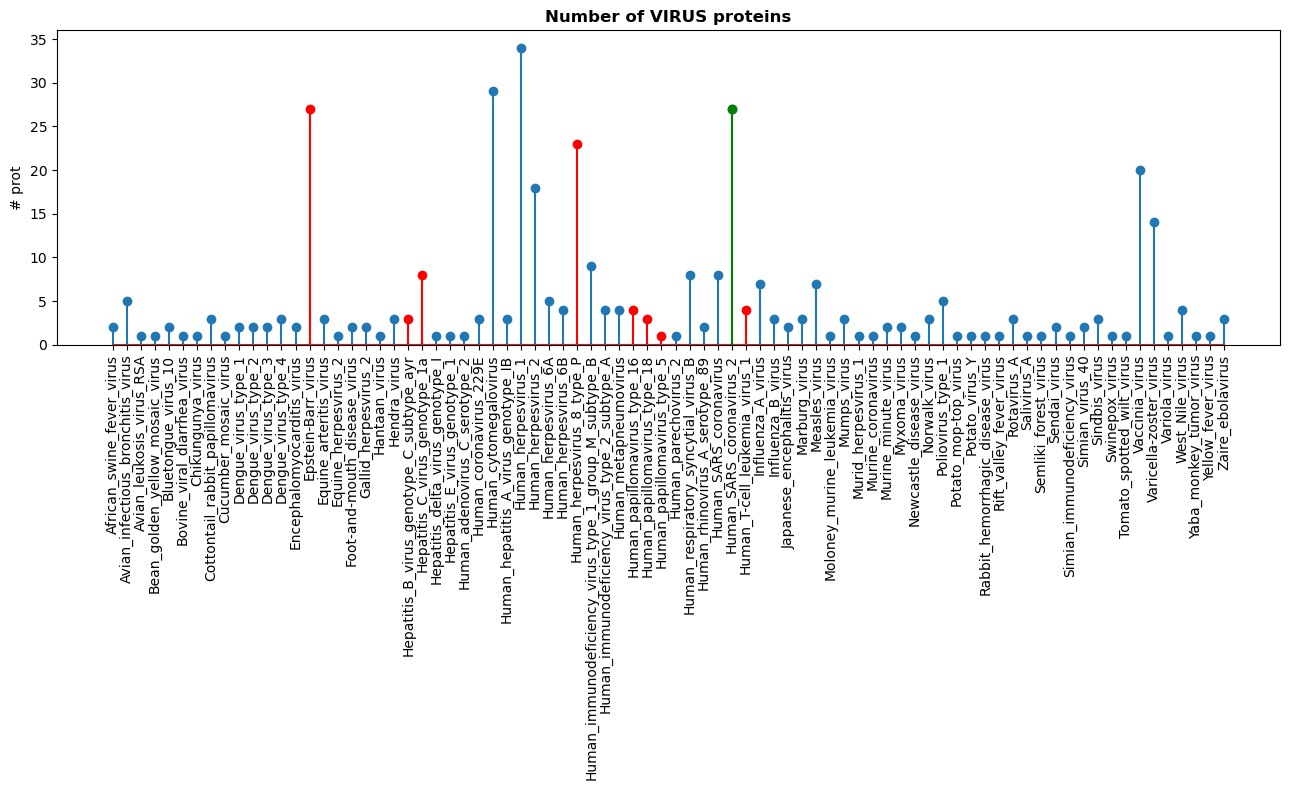

In [119]:
_,ax = plt.subplots(1,1,figsize=(13,8))
ax.stem(np.arange(len(virus_nodes0_list))[neigh0_isOncogenic], 
        onco_virus_type0_size, 
        markerfmt="r",
        linefmt="r")

ax.stem(np.arange(len(virus_nodes0_list))[np.logical_not(neigh0_isOncogenic)], 
        nonco_virus_type0_size, 
        markerfmt="C0",
        linefmt="C0")
ax.stem([44],
        virus_type0_size[44], 
        markerfmt="green",
        linefmt="green")
ax.set_xticks(np.arange(len(virus_nodes0_list)))
ax.set_xticklabels(list(virus_nodes0_dict.keys()), rotation=90)
ax.set_title("Number of VIRUS proteins", fontweight="bold")
ax.set_ylabel("# prot")
ax.set_ylim([0,36])
plt.tight_layout()

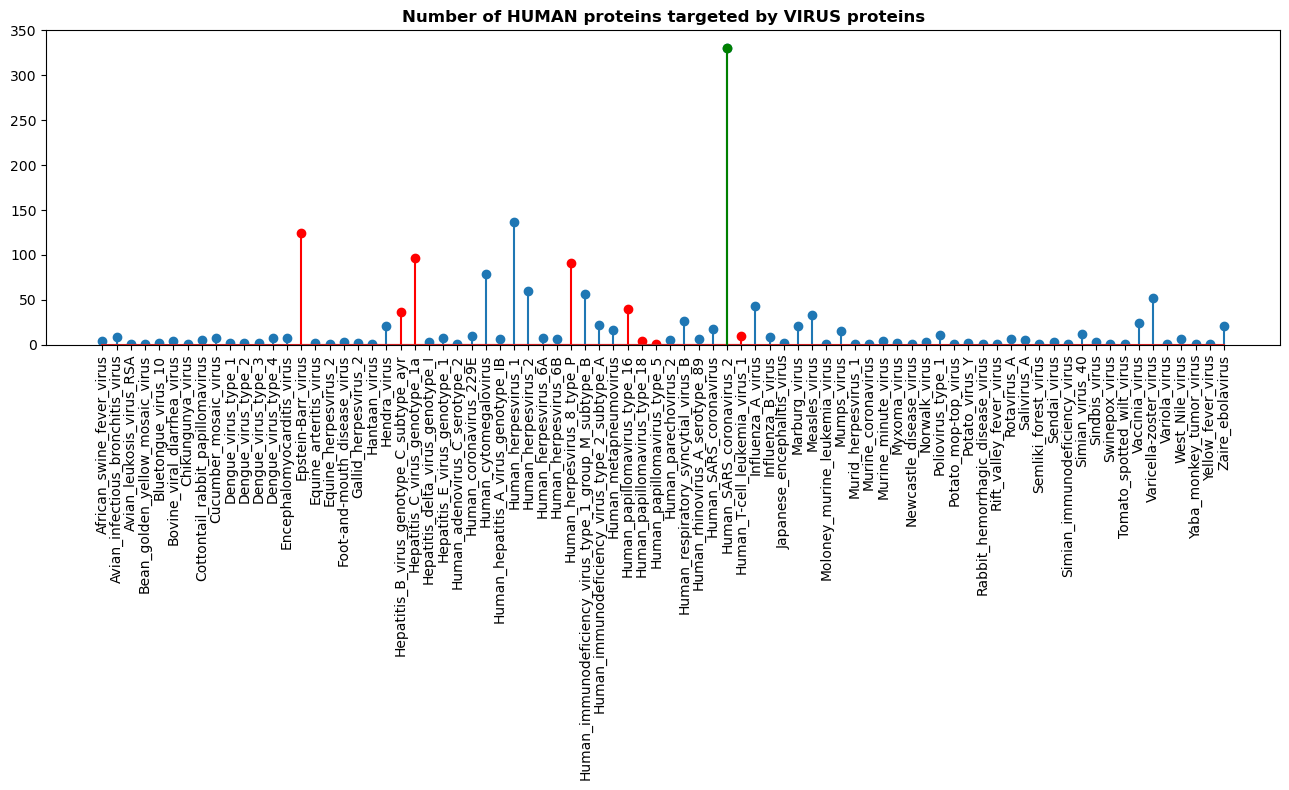

In [120]:
_,ax = plt.subplots(1,1,figsize=(13,8))
ax.stem(np.arange(len(virus_nodes1_list))[neigh0_isOncogenic], 
        onco_virus_type1_size, 
        markerfmt="r",
        linefmt="r")

ax.stem(np.arange(len(virus_nodes1_list))[np.logical_not(neigh0_isOncogenic)], 
        nonco_virus_type1_size, 
        markerfmt="C0",
        linefmt="C0")
ax.stem([44],
        virus_type1_size[44], 
        markerfmt="green",
        linefmt="green")
ax.set_xticks(np.arange(len(virus_nodes1_list)))
ax.set_xticklabels(list(virus_nodes1_dict.keys()), rotation=90)
ax.set_title("Number of HUMAN proteins targeted by VIRUS proteins", fontweight="bold")
ax.set_ylim([0,350])
plt.tight_layout()

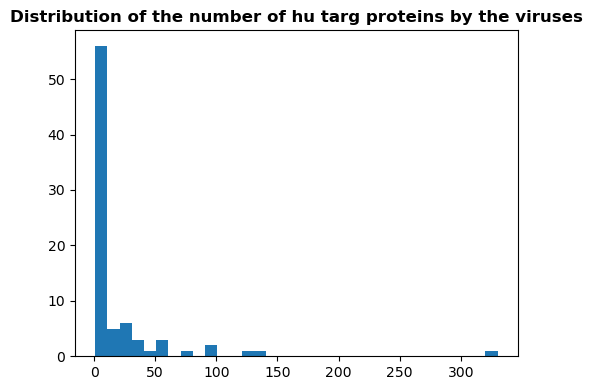

In [121]:
plt.figure(figsize=(5,4))
plt.hist(virus_type1_size, bins=33)
plt.title("Distribution of the number of hu targ proteins by the viruses", fontweight="bold")
plt.tight_layout()

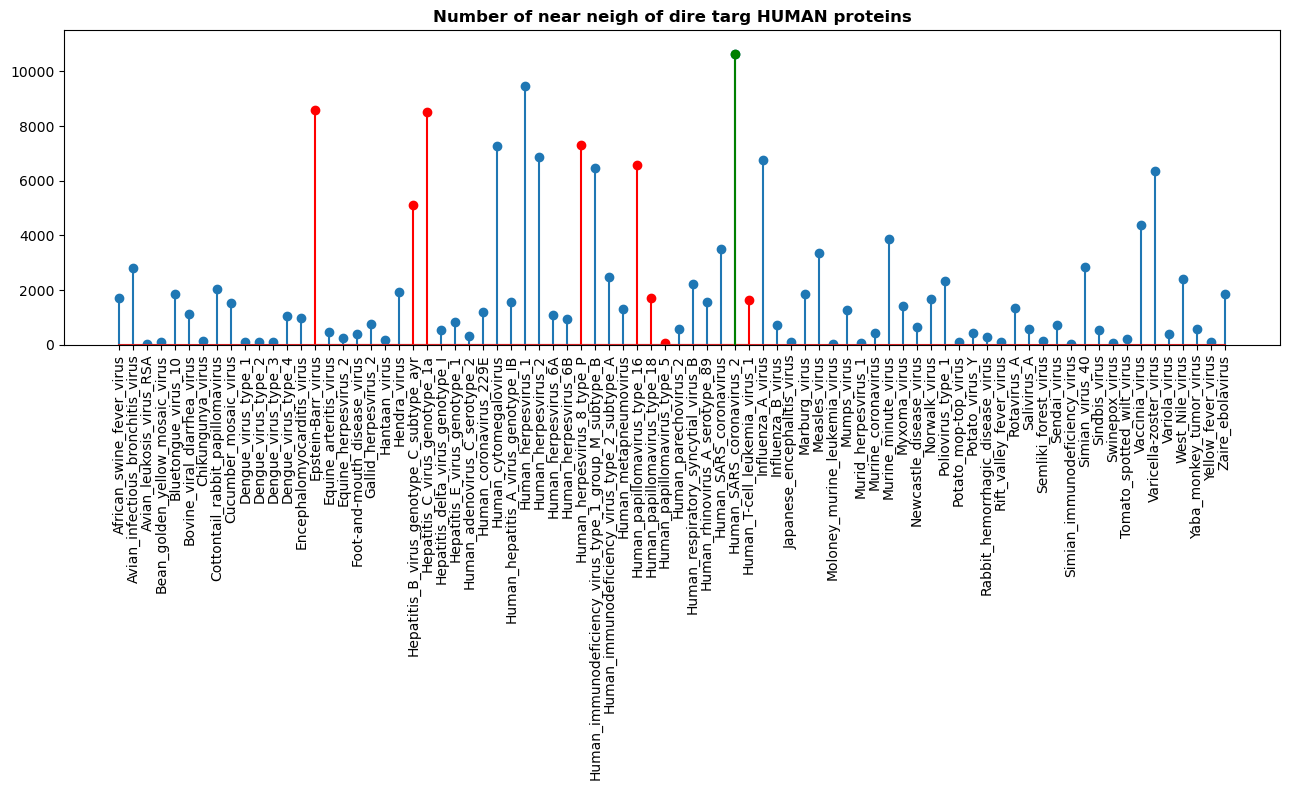

In [122]:
_,ax = plt.subplots(1,1,figsize=(13,8))
ax.stem(np.arange(len(virus_nodes2_list))[neigh2_isOncogenic], 
        onco_virus_type2_size, 
        markerfmt="r",
        linefmt="r")

ax.stem(np.arange(len(virus_nodes2_list))[np.logical_not(neigh2_isOncogenic)], 
        nonco_virus_type2_size, 
        markerfmt="C0",
        linefmt="C0")
ax.stem([44],
        virus_type2_size[44], 
        markerfmt="green",
        linefmt="green")
ax.set_xticks(np.arange(len(virus_nodes2_list)))
ax.set_xticklabels(list(virus_nodes2_dict.keys()), rotation=90)
ax.set_title("Number of near neigh of dire targ HUMAN proteins", fontweight="bold")
ax.set_ylim([0,11500])
plt.tight_layout()

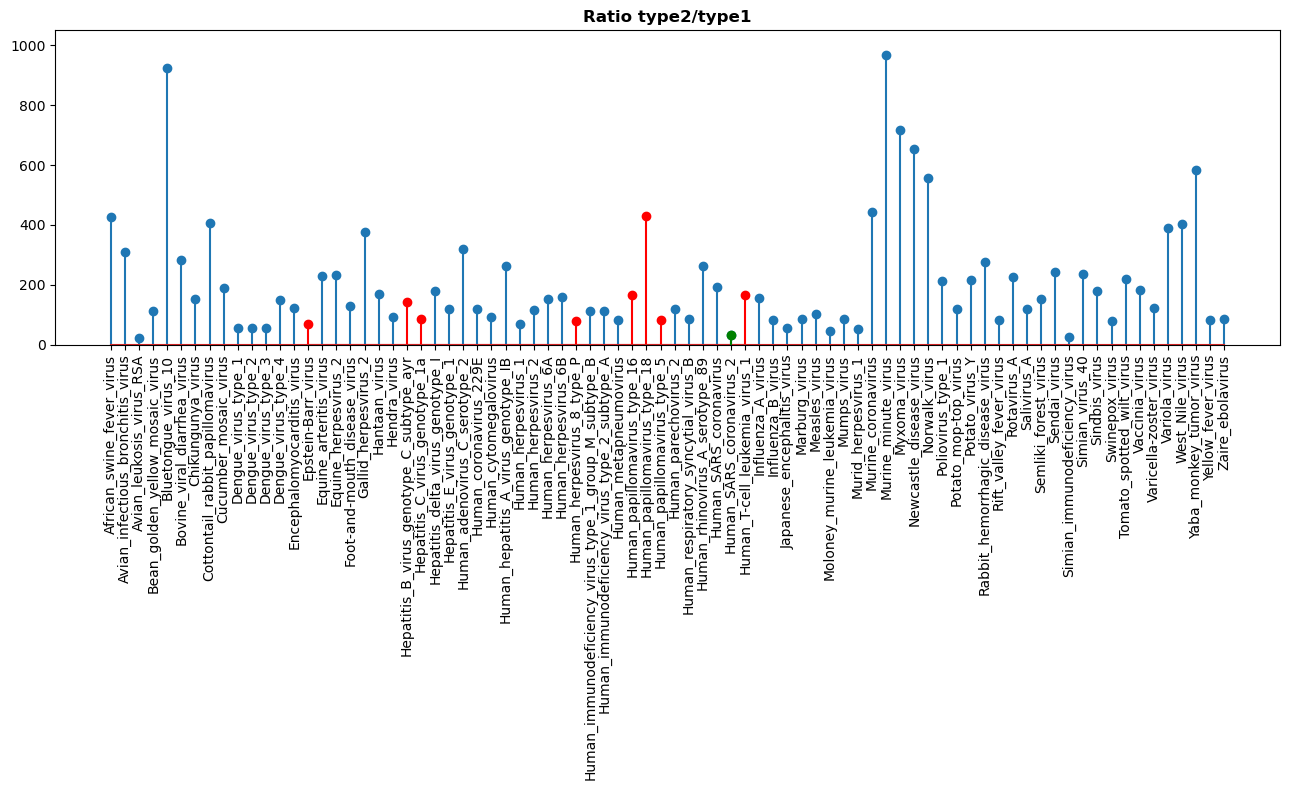

In [123]:
_,ax = plt.subplots(1,1,figsize=(13,8))
ax.stem(np.arange(len(virus_nodes2_list))[neigh2_isOncogenic], 
        onco_virus_type2_size/onco_virus_type1_size, 
        markerfmt="r",
        linefmt="r")

ax.stem(np.arange(len(virus_nodes2_list))[np.logical_not(neigh2_isOncogenic)], 
        nonco_virus_type2_size/nonco_virus_type1_size, 
        markerfmt="C0",
        linefmt="C0")

ax.stem([44],
        virus_type2_size[44]/virus_type1_size[44], 
        markerfmt="green",
        linefmt="green")

ax.set_xticks(np.arange(len(virus_nodes2_list)))
ax.set_xticklabels(list(virus_nodes2_dict.keys()), rotation=90)
ax.set_title("Ratio type2/type1", fontweight="bold")
ax.set_ylim([0,1050])
plt.tight_layout()

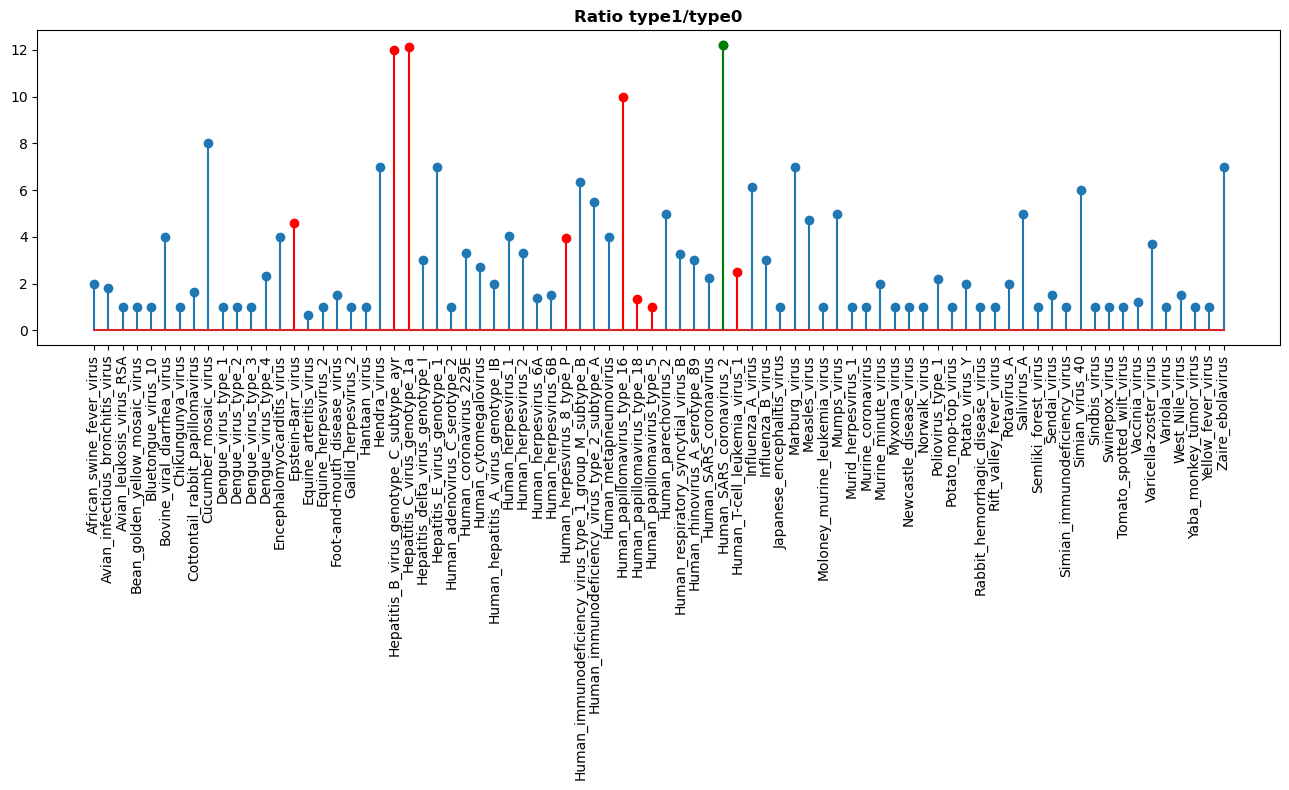

In [126]:
_,ax = plt.subplots(1,1,figsize=(13,8))
ax.stem(np.arange(len(virus_nodes2_list))[neigh2_isOncogenic], 
        onco_virus_type1_size/onco_virus_type0_size,
        markerfmt="r",
        linefmt="r")

ax.stem(np.arange(len(virus_nodes2_list))[np.logical_not(neigh2_isOncogenic)], 
        nonco_virus_type1_size/nonco_virus_type0_size,
        markerfmt="C0",
        linefmt="C0")

ax.stem([44],
        virus_type1_size[44]/virus_type0_size[44], 
        markerfmt="green",
        linefmt="green")
ax.set_xticks(np.arange(len(virus_nodes2_list)))
ax.set_xticklabels(list(virus_nodes2_dict.keys()), rotation=90)
ax.set_title("Ratio type1/type0", fontweight="bold")
#ax.set_ylim([0,450])
plt.tight_layout()

# ENRICHMENT ON DIRECTLY TARGETED

In [92]:
enr_lvc = gseapy.enrichr(gene_list="Virus_data_Enriched_0.7_Neigh_0/uniqueType1nodes.txt", # or "./tests/data/gene_list.txt",
                 gene_sets=['KEGG_2021_Human'],
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

In [96]:
enr_lvc.results.sort_values("P-value").head(5).iloc[0,-1].split(";")

['RB1',
 'ITGB1',
 'GSK3B',
 'CDKN1B',
 'TRADD',
 'PIK3CD',
 'FASLG',
 'PIK3CB',
 'RBPJ',
 'TNF',
 'IKBKB',
 'TBK1',
 'CCND2',
 'CASP8',
 'CREB3L3',
 'HEY1',
 'CCND1',
 'PPP2R5E',
 'AKT2',
 'AKT3',
 'PRKACA',
 'JAK1',
 'ATP6AP1',
 'HLA-B',
 'PPP2R5B',
 'HLA-C',
 'TSC2',
 'PPP2R5A',
 'SCRIB',
 'TSC1',
 'PPP2R5D',
 'PPP2R5C',
 'HLA-E',
 'TNFRSF1A',
 'CREB1',
 'RBL1',
 'PIK3CA',
 'TBPL2',
 'IRF1',
 'COL6A1',
 'TBPL1',
 'TP53',
 'TLR3',
 'IFNAR1',
 'PTGER4',
 'ATP6V1A',
 'NOTCH2',
 'HDAC2',
 'NOTCH1',
 'HDAC1',
 'PSEN1',
 'PTGS2',
 'EGFR',
 'RELA',
 'SLC9A3R1',
 'NRAS',
 'TERT',
 'EIF4EBP1',
 'MAPK1',
 'MAPK3',
 'BCAP31',
 'CREBBP',
 'JAG1',
 'CSNK1A1',
 'IFNB1',
 'STAT1',
 'EGF',
 'STAT2',
 'ISG15',
 'DLG1',
 'CDK6',
 'RPS6KB1',
 'CDK4',
 'RHEB',
 'PSMC1',
 'CDK2',
 'CTNNB1',
 'FAS',
 'BAX',
 'ATM',
 'KRAS']

# SYNTETIC VIRUSES

In [12]:
unique_type0_nodes, counts_type0_nodes = np.unique(np.concatenate(virus_nodes0_list), return_counts=True)
probs_type0 = counts_type0_nodes/sum(counts_type0_nodes)
unique_type1_nodes, counts_type1_nodes = np.unique(np.concatenate(virus_nodes1_list), return_counts=True)
probs_type1 = counts_type1_nodes/sum(counts_type1_nodes)

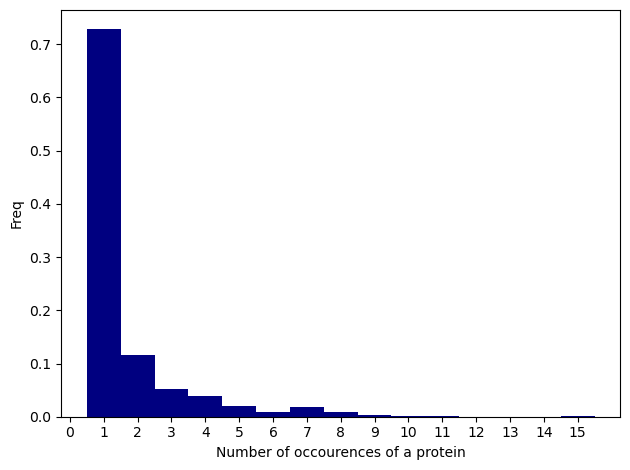

In [13]:
# hwo do the number of directly targeted nodes distributes?
plt.hist(counts_type1_nodes, bins=15, align="left", color="navy", density=True)
plt.ylabel("Freq")
plt.xlabel("Number of occourences of a protein")
plt.xticks(np.arange(0,16))
plt.tight_layout()

It seems that there is an exponential like distribution, which could mean that some nodes are specifically targeted

## Human network

In [3]:
human_ppi = pd.read_csv("data_BIOGRID/BIOGRID_homo_sapiens_ncbi.edges", sep=" ", header=None)
human_ppi.columns=["source", "target", "weight"]

#human PPI connections with respective identificative index
human_nodes = pd.read_csv("data_BIOGRID/BIOGRID_homo_sapiens_ncbi.nodes", sep=" ", index_col=0)

#create human PPI network
human_g = gt.Graph(directed=False)
human_g.add_edge_list(human_ppi.values)

In [15]:
def create_syntetic_virus(virus_targeted_proteins):
    #human PPI edges
    human_ppi = pd.read_csv("BIOSTR_homo_sapiens.edges", sep=" ", header=None)
    human_ppi.columns=["source", "target", "weight"]

    #human PPI connections with respective identificative index
    human_nodes = pd.read_csv("BIOSTR_homo_sapiens.nodes", sep=" ", index_col=0)

    #create human PPI network
    human_g = gt.Graph(directed=False)
    human_g.add_edge_list(human_ppi.values)

    # find all the first nearest neighbors of the targeted proteins
    first_neigh_nodes_rep=[]
    for vi in virus_targeted_proteins:
        first_neigh_nodes_rep.append(human_g.get_all_neighbors(human_nodes[human_nodes["nodeSymbol"]==vi].index.values))
    first_neigh_nodes=np.unique(np.concatenate(first_neigh_nodes_rep))

    # mask which tells which proteins in the human genome are the NN found above
    neighbors_mask = np.isin(np.arange(len(human_nodes)), first_neigh_nodes)

    # create vertex property map to remeber which node corresponds to which protein
    labels = human_g.new_vertex_property("int", np.arange(len(human_nodes)))
    human_g.vertex_properties["labels"]=labels

    # create a view of a graph and hide all the vertices not in the mask
    gw = gt.GraphView(human_g, vfilt=neighbors_mask)
    # then create a new graph in which the hidden nodes are pruned
    gf = gt.Graph(gw, prune=True)
    #by doing these you can retrive the original names
    original_index_nodes = gf.vp["labels"].get_array()
    return gf, original_index_nodes

In [179]:
np.random.seed(1234)
nnodes = []
target_lcc = []
target_size = []
for i in tqdm(range(10000)):
    number_picked_type1_prot=int(np.round(np.random.exponential(10,1))[0])+1
    random_nodes = np.random.choice(a=list(human_nodes.nodeSymbol), size=number_picked_type1_prot, replace=False)
    gp, nlp = create_syntetic_virus(random_nodes)
    nnodes.append(number_picked_type1_prot)
    target_lcc.append(gt.topology.extract_largest_component(gp).num_vertices())
    target_size.append(len(nlp))

100%|█████████████████████████████████████| 10000/10000 [52:23<00:00,  3.18it/s]


In [224]:
(np.array(target_size)==np.array(target_lcc)).sum()/len(target_size)

0.0731

In [190]:
for ts, tl in zip(target_size, target_lcc):
    print(ts,tl, ts==tl)

125 117 False
577 575 False
15 8 False
533 527 False
24 16 False
144 123 False
610 607 False
29 22 False
2455 2453 False
259 258 False
1417 1412 False
612 610 False
80 69 False
2992 2991 False
692 692 True
423 422 False
1037 1032 False
52 38 False
166 160 False
246 237 False
2015 2013 False
2063 2058 False
718 709 False
117 111 False
491 483 False
1151 1149 False
828 822 False
1635 1623 False
119 115 False
135 133 False
99 89 False
104 77 False
432 426 False
525 508 False
1329 1326 False
199 195 False
1332 1332 True
1027 1024 False
872 868 False
2237 2230 False
1115 1111 False
870 868 False
2672 2667 False
211 205 False
1002 996 False
255 248 False
2308 2304 False
95 52 False
812 808 False
832 827 False
1090 1082 False
867 862 False
102 88 False
1057 1056 False
192 185 False
79 79 True
3003 3002 False
1428 1423 False
104 84 False
546 546 True
24 21 False
981 975 False
475 473 False
1153 1150 False
43 35 False
40 38 False
547 536 False
310 307 False
181 166 False
201 180 False
106 101 F

In [188]:
np.array(target_lcc)==np.array(target_size)

array([False, False, False, ..., False, False, False])

<StemContainer object of 3 artists>

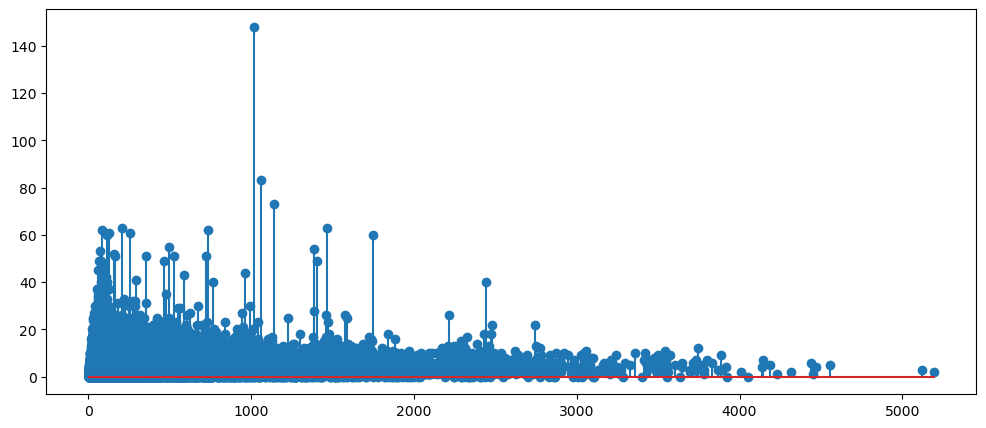

In [196]:
plt.figure(figsize=(12,5))
plt.stem(target_size, np.array(target_size)-np.array(target_lcc))

<StemContainer object of 3 artists>

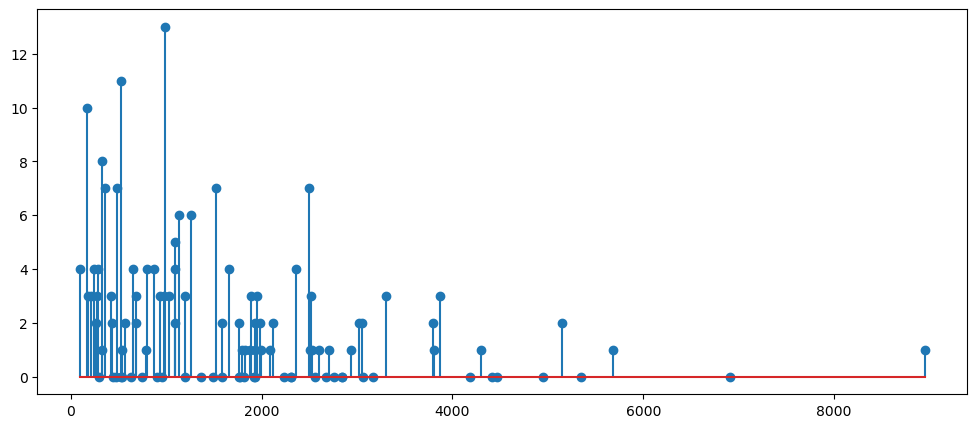

In [198]:
plt.figure(figsize=(12,5))
plt.stem(synt_vir_target_size, np.array(synt_vir_target_size)-np.array(synt_vir_target_lcc))

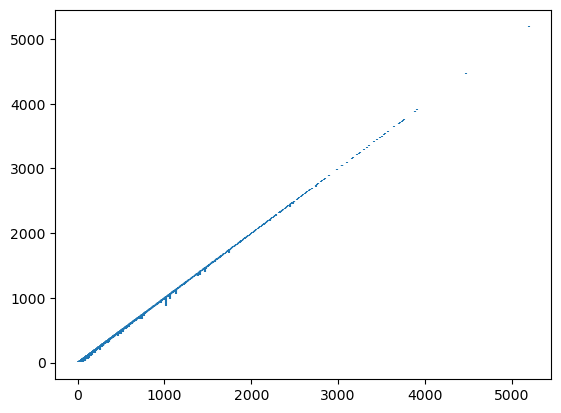

In [186]:
plt.scatter(target_size, target_lcc, s=0)
for ts, tl in zip(target_size, target_lcc):
    plt.vlines(ts,ts,tl)

## Get virus null_model

### Targeted

In [248]:
np.random.seed(1234)
nodes_target_list = []
synt_vir_target_lcc = []
synt_vir_target_size = []
for i in tqdm(range(1000)):
    number_picked_type1_prot=int(np.round(np.random.exponential(10,1))[0])+1
    random_nodes = np.random.choice(a=unique_type1_nodes, size=number_picked_type1_prot, p=probs_type1, replace=False)
    nodes_target_list.append(random_nodes)
    gp, nlp = create_syntetic_virus(random_nodes)
    synt_vir_target_lcc.append(gt.topology.extract_largest_component(gp).num_vertices())
    synt_vir_target_size.append(len(nlp))

100%|███████████████████████████████████████| 1000/1000 [04:26<00:00,  3.75it/s]


In [249]:
(np.array(synt_vir_target_lcc)==np.array(synt_vir_target_size)).sum()/len(synt_vir_target_size)

0.349

In [250]:
np.mean((np.array(synt_vir_target_size)-np.array(synt_vir_target_lcc))/len(synt_vir_target_size))

0.0019850000000000002

In [101]:
#write
with open('Files/Syntetic/nodes_synt_target.txt', 'w') as f:
    for sublist in nodes_target_list:
        f.write(' '.join(sublist) + '\n')
        
np.savetxt(X=synt_vir_target_lcc, fname="Files/Syntetic/lcc_synt_target.txt", fmt="%d")
np.savetxt(X=synt_vir_target_size, fname="Files/Syntetic/net_dim_synt_target.txt", fmt="%d")

In [102]:
#read
with open('Files/Syntetic/nodes_synt_target.txt') as f:
    nodes_target_list= f.readlines()
nodes_target_list = [rnl[:-1].split(" ") for rnl in nodes_target_list]

synt_vir_target_size = np.loadtxt("Files/Syntetic/net_dim_synt_target.txt", dtype=int)
synt_vir_target_lcc = np.loadtxt("Files/Syntetic/lcc_synt_target.txt", dtype=int)

### Random

In [24]:
np.random.seed(1234)
random_nodes_list = []
synt_vir_random_lcc = []
synt_vir_random_size = []
for i in tqdm(range(100)):
    number_picked_type1_prot=int(np.round(np.random.exponential(10,1))[0])+1
    random_nodes = np.random.choice(a=np.array(human_nodes["nodeSymbol"]), size=number_picked_type1_prot, replace=False)
    nodes_random_list.append(random_nodes)
    gp, nlp = create_syntetic_virus(random_nodes)
    synt_vir_random_lcc.append(gt.topology.extract_largest_component(gp).num_vertices())
    synt_vir_random_size.append(len(nlp))

100%|█████████████████████████████████████████| 100/100 [00:30<00:00,  3.32it/s]


In [234]:
(np.array(synt_vir_random_lcc)==np.array(synt_vir_random_size)).sum()/len(synt_vir_random_size)

0.06

In [246]:
np.mean((np.array(synt_vir_random_size)-np.array(synt_vir_random_lcc))/len(synt_vir_random_size))

0.07149999999999998

In [26]:
with open('Files/Syntetic/nodes_synt_random.txt', 'w') as f:
    for sublist in nodes_random_list:
        f.write(' '.join(sublist) + '\n')
        
np.savetxt(X=synt_vir_random_lcc, fname="Files/Syntetic/lcc_synt_random.txt", fmt="%d")
np.savetxt(X=synt_vir_random_size, fname="Files/Syntetic/net_dim_synt_random.txt", fmt="%d")

In [107]:
#read
with open('Files/Syntetic/nodes_synt_random.txt') as f:
    nodes_random_list= f.readlines()
nodes_random_list = [rnl[:-1].split(" ") for rnl in nodes_random_list]

synt_vir_random_size = np.loadtxt("Files/Syntetic/net_dim_synt_random.txt", dtype=int)
synt_vir_random_lcc = np.loadtxt("Files/Syntetic/lcc_synt_random.txt", dtype=int)

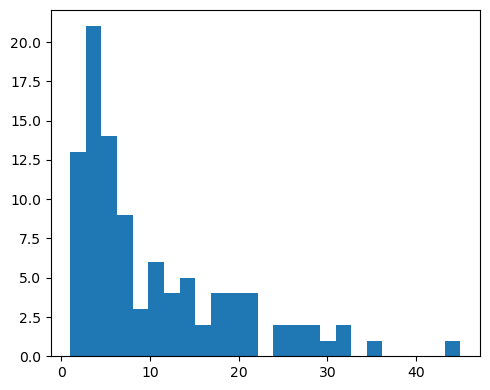

In [44]:
plt.figure(figsize=(5,4))
plt.hist([len(rn) for rn in nodes_random_list], bins=25)
plt.tight_layout()

## Get SARS-COV2 null_model

### Targeted

In [28]:
#exctrating proteins targeted by other nodes
np.random.seed(12345)
random_nodes_sars_target_list = []
synt_vir_sars_target_lcc = []
synt_vir_sars_target_size = []
for i in tqdm(range(100)):
    random_nodes_sars_target = np.random.choice(a=unique_type1_nodes, size=330, p=probs_type1, replace=False)
    random_nodes_sars_target_list.append(random_nodes_sars_target)
    gp, nlp = create_syntetic_virus(random_nodes_sars_target)
    synt_vir_sars_target_lcc.append(gt.topology.extract_largest_component(gp).num_vertices())
    synt_vir_sars_target_size.append(len(nlp))

100%|█████████████████████████████████████████| 100/100 [01:48<00:00,  1.08s/it]


In [238]:
(np.array(synt_vir_sars_target_lcc)==np.array(synt_vir_sars_target_size)).sum()/len(synt_vir_sars_target_size)

0.62

In [245]:
np.mean((np.array(synt_vir_sars_target_size)-np.array(synt_vir_sars_target_lcc))/len(synt_vir_sars_target_size))

0.0047

In [29]:
with open('Files/Syntetic/nodes_synt_sars_target.txt', 'w') as f:
    for sublist in random_nodes_sars_target_list:
        f.write(' '.join(sublist) + '\n')
        
np.savetxt(X=synt_vir_sars_target_lcc, fname="Files/Syntetic/lcc_synt_sars_target.txt", fmt="%d")
np.savetxt(X=synt_vir_sars_target_size, fname="Files/Syntetic/net_dim_synt_sars_target.txt", fmt="%d")

In [45]:
#read
with open('Files/Syntetic/nodes_synt_sars_target.txt') as f:
    random_nodes_sars_target_list = f.readlines()
random_nodes_sars_target_list = [rnl[:-1].split(" ") for rnl in random_nodes_sars_target_list]

synt_vir_sars_target_size = np.loadtxt("Files/Syntetic/net_dim_synt_sars_target.txt", dtype=int)
synt_vir_sars_target_lcc = np.loadtxt("Files/Syntetic/lcc_synt_sars_target.txt", dtype=int)

### Random

In [46]:
#exctrating proteins targeted by other nodes
np.random.seed(12345)
random_nodes_sars_random_list = []
synt_vir_sars_random_lcc = []
synt_vir_sars_random_size = []
for i in tqdm(range(100)):
    random_nodes_sars_random = np.random.choice(a=np.array(human_nodes["nodeSymbol"]), size=330, replace=False)
    random_nodes_sars_random_list.append(random_nodes_sars_random)
    gp, nlp = create_syntetic_virus(random_nodes_sars_random)
    synt_vir_sars_random_lcc.append(gt.topology.extract_largest_component(gp).num_vertices())
    synt_vir_sars_random_size.append(len(nlp))

100%|█████████████████████████████████████████| 100/100 [01:34<00:00,  1.05it/s]


In [239]:
(np.array(synt_vir_sars_random_lcc)==np.array(synt_vir_sars_random_size)).sum()/len(synt_vir_sars_random_size)

0.0

In [244]:
np.mean((np.array(synt_vir_sars_random_size)-np.array(synt_vir_sars_random_lcc))/len(synt_vir_sars_random_size))

0.0904

In [47]:
with open('Files/Syntetic/nodes_synt_sars_random.txt', 'w') as f:
    for sublist in random_nodes_sars_random_list:
        f.write(' '.join(sublist) + '\n')

np.savetxt(X=synt_vir_sars_random_lcc, fname="Files/Syntetic/lcc_synt_sars_random.txt", fmt="%d")
np.savetxt(X=synt_vir_sars_random_size, fname="Files/Syntetic/net_dim_synt_sars_random.txt", fmt="%d")

In [48]:
#read
with open('Files/Syntetic/nodes_synt_sars_random.txt') as f:
    random_nodes_sars_random_list = f.readlines()
random_nodes_sars_random_list = [rnl[:-1].split(" ") for rnl in random_nodes_sars_random_list]

synt_vir_sars_random_size = np.loadtxt("Files/Syntetic/net_dim_synt_sars_random.txt", dtype=int)
synt_vir_sars_random_lcc = np.loadtxt("Files/Syntetic/lcc_synt_sars_random.txt", dtype=int)

### From Enrichment

In [20]:
enr_sars = gseapy.enrichr(gene_list="Virus_data_Enriched_0.7_Neigh_0/Human_SARS_coronavirus_2/type1nodes.txt", # or "./tests/data/gene_list.txt",
                          gene_sets=['GO_Biological_Process_2021'],#['KEGG_2021_Human'],
                          organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                          outdir=None # don't write to disk
                          )

In [22]:
enr_sars.results.sort_values("Odds Ratio", ascending=False).head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
3,GO_Biological_Process_2021,"DNA replication, synthesis of RNA primer (GO:0...",4/5,3.592232e-07,0.000185,0,0,241.337423,3581.283704,POLA1;PRIM2;POLA2;PRIM1
91,GO_Biological_Process_2021,regulation of snRNA transcription by RNA polym...,2/5,2.626386e-03,0.058063,0,0,39.973577,237.528847,MEPCE;LARP7
90,GO_Biological_Process_2021,protein processing involved in protein targeti...,2/5,2.626386e-03,0.058063,0,0,39.973577,237.528847,PMPCB;PMPCA
92,GO_Biological_Process_2021,glutathione transport (GO:0034635),2/5,2.626386e-03,0.058063,0,0,39.973577,237.528847,SLC9A3R1;ABCC1
47,GO_Biological_Process_2021,U4 snRNA 3'-end processing (GO:0034475),3/8,2.344112e-04,0.010041,0,0,36.082569,301.593767,EXOSC5;EXOSC8;EXOSC3


In [243]:
#find the top 50 pathways according to a quantity (here PVALUE but could also be OddsRatio or others)
top_enrich_sars = [list(enr_sars.results.sort_values("P-value").loc[i,["Term","Overlap","Odds Ratio"]]) for i in range(50)]
#create a vector containing numerator and denominator of the overlaps
overl_list = np.array([np.array(t[1].split("/")).astype(int) for t in top_enrich_sars])
#this are the data of the enrichment database
pathways_list = gseapy.get_library('GO_Biological_Process_2021', organism="Human")
#I extract the genes composing the pathways I'm considering
genes_in_paths_sars = [pathways_list[top_enrich_sars[i][0]] for i in range(len(top_enrich_sars))]

In [269]:
#from every pathway I extract a number of genes from a binomial distribution with size equal to the number of genes in the pathway
#and probability equal to the overlap
exctractions = [sp.stats.binom.rvs(n=overl_list[i,1], p=overl_list[i,0]/overl_list[i,1]) for i in range(len(overl_list))]
#from each set of genes of each patways I do a number of extraction equal to the number found before
new_gene_set = np.unique(np.concatenate([np.random.choice(a=genes_in_paths_sars[i], size=exctractions[i], replace=False) for i in range(len(exctractions))]))
#not all the proteins in GO are also present in our human ppi
new_gene_set = new_gene_set[np.isin(new_gene_set,human_nodes.nodeSymbol)]

In [276]:
#exctrating proteins targeted by other nodes
np.random.seed(12345)
nodes_sars_enrich_list = []
synt_vir_sars_enrich_lcc = []
synt_vir_sars_enrich_size = []

for i in tqdm(range(100)):
    new_gene_set = []
    while len(new_gene_set)<330:
        exctractions = [sp.stats.binom.rvs(n=overl_list[i,1], p=overl_list[i,0]/overl_list[i,1]) for i in range(len(overl_list))]
        new_gene_set = np.unique(np.concatenate([np.random.choice(a=genes_in_paths_sars[i], size=exctractions[i], replace=False) for i in range(len(exctractions))]))
        new_gene_set = new_gene_set[np.isin(new_gene_set,human_nodes.nodeSymbol)]
    def_gene_set = np.random.choice(new_gene_set, 330, replace=False)
    nodes_sars_enrich_list.append(def_gene_set)
    
    gp, nlp = create_syntetic_virus(def_gene_set)
    synt_vir_sars_enrich_lcc.append(gt.topology.extract_largest_component(gp).num_vertices())
    synt_vir_sars_enrich_size.append(len(nlp))



100%|█████████████████████████████████████████| 100/100 [03:01<00:00,  1.82s/it]


In [241]:
(np.array(synt_vir_sars_enrich_lcc)==np.array(synt_vir_sars_enrich_size)).sum()/len(synt_vir_sars_enrich_size)

0.25

In [243]:
np.mean((np.array(synt_vir_sars_enrich_size)-np.array(synt_vir_sars_enrich_lcc))/len(synt_vir_sars_enrich_size))

0.0148

In [278]:
with open('Files/Syntetic/nodes_synt_sars_enrich.txt', 'w') as f:
    for sublist in nodes_sars_enrich_list:
        f.write(' '.join(sublist) + '\n')

np.savetxt(X=synt_vir_sars_enrich_lcc, fname="Files/Syntetic/lcc_synt_sars_enrich.txt", fmt="%d")
np.savetxt(X=synt_vir_sars_enrich_size, fname="Files/Syntetic/net_dim_synt_sars_enrich.txt", fmt="%d")

In [49]:
#read
with open('Files/Syntetic/nodes_synt_sars_enrich.txt') as f:
    nodes_sars_enrich_list = f.readlines()
nodes_sars_enrich_list = [rnl[:-1].split(" ") for rnl in nodes_sars_enrich_list]

synt_vir_sars_enrich_size = np.loadtxt("Files/Syntetic/net_dim_synt_sars_enrich.txt", dtype=int)
synt_vir_sars_enrich_lcc = np.loadtxt("Files/Syntetic/lcc_synt_sars_enrich.txt", dtype=int)

In [308]:
g_enr, nlp_enr = create_syntetic_virus(def_gene_set)

In [334]:
g_sars, nlp_sars = create_syntetic_virus(np.loadtxt("Virus_data_Enriched_0.7_Neigh_0/Human_SARS_coronavirus_2/type1nodes.txt", dtype=str))

In [335]:
betw_sars = gt.centrality.betweenness(g_sars)[0].get_array()

In [311]:
betw_enr = gt.centrality.betweenness(g_enr)[0].get_array()

In [339]:
enr_test = gseapy.enrichr(gene_list=list(human_nodes.iloc[nlp_enr[np.argsort(betw_enr)[::-1][:100]]].nodeSymbol),
                          gene_sets=['GO_Biological_Process_2021'],#['KEGG_2021_Human'],
                          organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                          outdir=None # don't write to disk
                          )

In [340]:
enr_sars = gseapy.enrichr(gene_list=list(human_nodes.iloc[nlp_sars[np.argsort(betw_sars)[::-1][:100]]].nodeSymbol),
                          gene_sets=['GO_Biological_Process_2021'],#['KEGG_2021_Human'],
                          organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                          outdir=None # don't write to disk
                          )

In [199]:
enr_test.results.sort_values("P-value")

NameError: name 'enr_test' is not defined

In [19]:
enr_sars.results.sort_values("Odds Ratio")

NameError: name 'enr_sars' is not defined

In [344]:
enr_test.results[enr_test.results["Term"]==enr_sars.results.sort_values("P-value").loc[0,"Term"]]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
1,GO_Biological_Process_2021,protein deubiquitination (GO:0016579),20/267,3.265078e-18,3.323850e-15,0,0,19.8917,800.904465,VCP;SHMT2;PTEN;BRCA1;ESR1;ACTB;RHOA;RNF123;COP...


## Create original viruses

In [218]:
g1.get_vertices()[np.logical_not(np.isin(g1.get_vertices(),gt.topology.extract_largest_component(g1).get_vertices()))]

array([2591])

In [219]:
n1[2591]

13826

In [221]:
human_nodes.loc[2591]

nodeLabel     118164
nodeSymbol     SGSM3
Name: 2591, dtype: object

In [222]:
virus_nodes1_list[1]

['CD79A',
 'FBXL20',
 'TP53',
 'CXCL8',
 'CD209',
 'SMAD3',
 'PTGS2',
 'GBF1',
 'FBXL2']

In [211]:
g1, n1 = create_syntetic_virus(virus_nodes1_list[1])

In [226]:
lcc_vir, size_vir = [],[]
for vn1 in virus_nodes1_list:
    g0, n0 = create_syntetic_virus(vn1)
    lcc_now = gt.topology.extract_largest_component(g0, directed=False).num_vertices()
    size_now = g0.num_vertices()
    lcc_vir.append(lcc_now)
    size_vir.append(size_now)
    #print(size_now, lcc_now, lcc_now==size_now)
    

In [232]:
(np.array(size_vir)==np.array(lcc_vir)).sum()/len(size_vir)

0.625

## Results

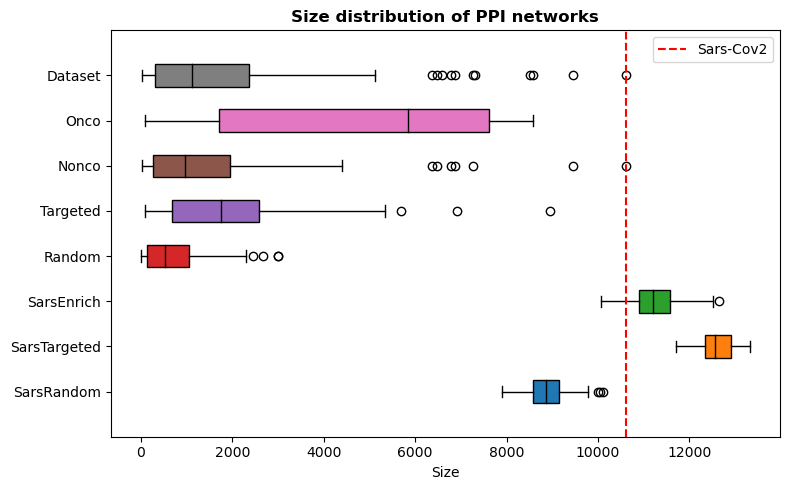

In [51]:
_,ax = plt.subplots(1,1, figsize=(8,5))

boxplot_list = [synt_vir_sars_random_size, 
                synt_vir_sars_target_size,
                synt_vir_sars_enrich_size,
                synt_vir_random_size,
                synt_vir_target_size,
                nonco_virus_size,
                onco_virus_size,
                virus_size]

labels_list=["SarsRandom","SarsTargeted","SarsEnrich","Random","Targeted","Nonco","Onco","Dataset"]

bplot = ax.boxplot(boxplot_list, vert=False, patch_artist = True)

color_list = ["C"+str(i) for i in range(len(boxplot_list))]
for patch, med, color in zip(bplot['boxes'], bplot['medians'], color_list):
    plt.setp(patch, color=color)
    patch.set_edgecolor("k")
    med.set_color("k")
plt.vlines(len(virus_nodes2_list[44]),0,len(boxplot_list)+1, ls="--", color="red", label="Sars-Cov2")
plt.yticks(np.arange(len(boxplot_list))+1, labels=labels_list)
plt.ylim([0,len(boxplot_list)+1])
plt.xlabel("Size")
plt.legend()
plt.title("Size distribution of PPI networks", fontweight="bold")
plt.tight_layout()

In [54]:
import seaborn as sns

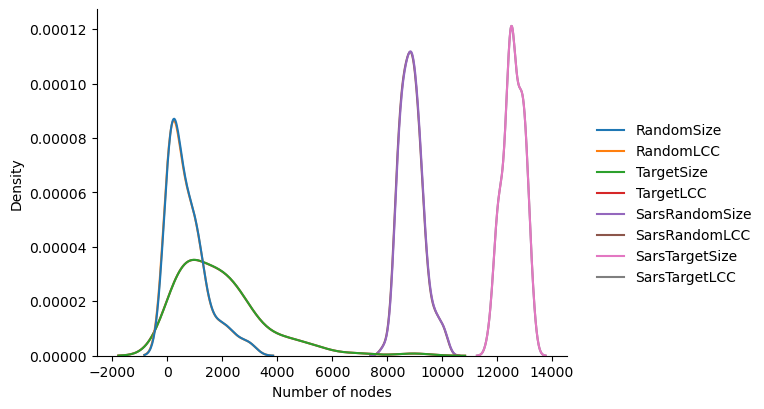

In [52]:
sns.displot(pd.DataFrame({"RandomSize":synt_vir_random_size, 
                          "RandomLCC":synt_vir_random_lcc,
                          "TargetSize":synt_vir_target_size,
                          "TargetLCC":synt_vir_target_lcc,
                          "SarsRandomSize":synt_vir_sars_random_size,
                          "SarsRandomLCC":synt_vir_sars_random_lcc,
                          "SarsTargetSize":synt_vir_sars_target_size,
                          "SarsTargetLCC":synt_vir_sars_target_lcc}),
            kind="kde", 
            height=4,
            aspect=1.5)
plt.xlabel("Number of nodes")
plt.show()

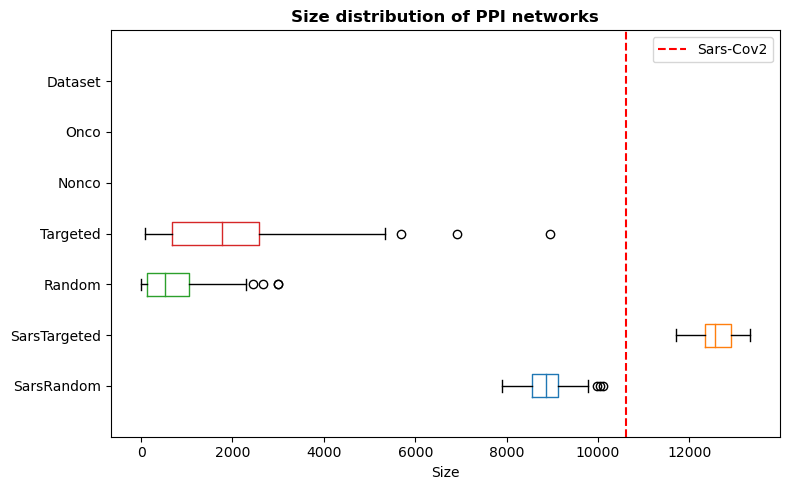

In [53]:
_,ax = plt.subplots(1,1, figsize=(8,5))
bplot = ax.boxplot([synt_vir_sars_rand_lcc, 
                    synt_vir_sars_target_lcc, 
                    synt_vir_random_lcc,
                    synt_vir_target_lcc],
                   vert=False)
for patch, med, color in zip(bplot['boxes'], bplot['medians'], ["C0","C1","C2","C3","C4","C5","C6", "C7"]):
    plt.setp(patch, color=color)
    med.set_color(color)
plt.vlines(len(virus_nodes2_list[44]),0,8, ls="--", color="red", label="Sars-Cov2")
plt.yticks([1,2,3,4,5,6,7], labels=["SarsRandom","SarsTargeted","Random","Targeted","Nonco","Onco","Dataset"])
plt.ylim([0,8])
plt.xlabel("Size")
plt.legend()
plt.title("Size distribution of PPI networks", fontweight="bold")
plt.tight_layout()

In [106]:
len(nodes_random_list)

200

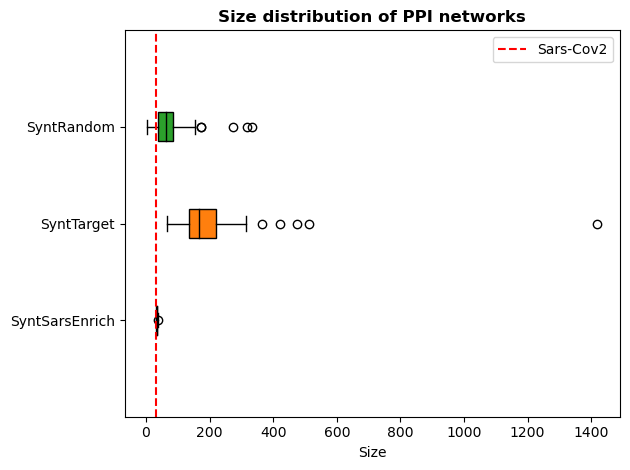

In [111]:
ratio_boxplots = [#synt_vir_sars_target_size/330, 
                  #synt_vir_sars_random_size/330,
                  synt_vir_sars_enrich_size/330,
                  synt_vir_target_size/np.array([len(a) for a in nodes_target_list]),
                  synt_vir_random_size/np.array([len(a) for a in nodes_random_list])]
#ratio_labels = ["SyntSarsTarget", "SyntSarsRandom", "SyntSarsEnrich","SyntTarget","SyntRandom"]
ratio_labels = ["SyntSarsEnrich","SyntTarget","SyntRandom"]

bplot = plt.boxplot(ratio_boxplots, vert=False, patch_artist = True)

color_list = ["C"+str(i) for i in range(len(ratio_boxplots))]

for patch, med, color in zip(bplot['boxes'], bplot['medians'], color_list):
    plt.setp(patch, color=color)
    patch.set_edgecolor("k")
    med.set_color("k")
    
plt.vlines(len(virus_nodes2_list[44])/len(virus_nodes1_list[44]),0,len(ratio_boxplots)+1, ls="--", color="red", label="Sars-Cov2")
plt.yticks(np.arange(len(ratio_boxplots))+1, labels=ratio_labels)
plt.ylim([0,len(ratio_boxplots)+1])
plt.xlabel("Size")
plt.legend()
plt.title("Size distribution of PPI networks", fontweight="bold")
plt.tight_layout()

<StemContainer object of 3 artists>

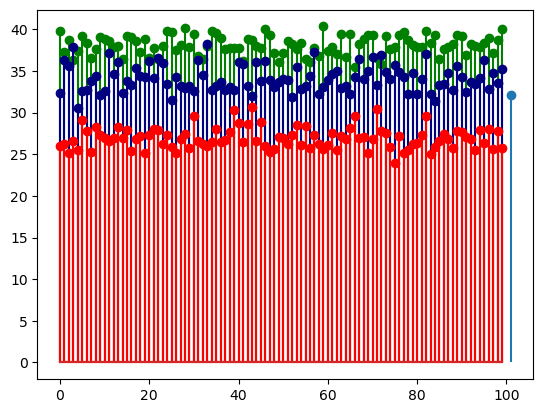

In [67]:
plt.stem(synt_vir_sars_target_size/330, linefmt="green")
plt.stem(synt_vir_sars_enrich_size/330, linefmt="navy")
plt.stem(synt_vir_sars_random_size/330, linefmt="r")

plt.stem(101, )

# NODE REMOVAL

In [127]:
def get_targeted_network(virus_targeted_proteins, NEIGH_ORD=1):
    #human PPI edges
    human_ppi = pd.read_csv("BIOSTR_homo_sapiens.edges", sep=" ", header=None)
    human_ppi.columns=["source", "target", "weight"]

    #human PPI connections with respective identificative index
    human_nodes = pd.read_csv("BIOSTR_homo_sapiens.nodes", sep=" ", index_col=0)

    #create human PPI network
    human_g = gt.Graph(directed=False)
    human_g.add_edge_list(human_ppi.values)

    # find all the first nearest neighbors of the targeted proteins
    if NEIGH_ORD==1:
        first_neigh_nodes_rep=[]
        for vi in virus_targeted_proteins:
            first_neigh_nodes_rep.append(human_g.get_all_neighbors(human_nodes[human_nodes["nodeSymbol"]==vi].index.values))
        first_neigh_nodes=np.unique(np.concatenate(first_neigh_nodes_rep))
    elif NEIGH_ORD==0:
        first_neigh_nodes=np.array(virus_targeted_proteins)
    else:
        raise ValueError("NEIGH_ORD must be either 0 or 1")
        
    # mask which tells which proteins in the human genome are the NN found above
    neighbors_mask = np.logical_not(np.isin(np.arange(len(human_nodes)), first_neigh_nodes))

    # create vertex property map to remeber which node corresponds to which protein
    labels = human_g.new_vertex_property("int", np.arange(len(human_nodes)))
    human_g.vertex_properties["labels"]=labels

    # create a view of a graph and hide all the vertices not in the mask
    gw = gt.GraphView(human_g, vfilt=neighbors_mask)
    # then create a new graph in which the hidden nodes are pruned
    gf = gt.Graph(gw, prune=True)
    #by doing these you can retrive the original names
    original_index_nodes = gf.vp["labels"].get_array()
    return gf, original_index_nodes

In [158]:
for 
g_pert, dict_pert = get_targeted_network(virus_nodes1_list[0], NEIGH_ORD=1)

In [173]:
np.zeros(len(human_nodes)).shape

(19945,)

In [ ]:
for k, v in zip(virus_nodes1_dict.keys(), virus_nodes1_dict.values()):
    g_pert0, dict_pert0 = get_targeted_network(v, NEIGH_ORD=0)
    g_pert1, dict_pert1 = get_targeted_network(v, NEIGH_ORD=1)
    
    pert_net_betw0 = gt.centrality.betweenness(g_pert0)[0].get_array()
    pert_betw_corr0 = np.zeros(len(human_nodes))
    pert_betw_corr0[dict_pert0]=pert_net_betw0
    np.savetxt(X=pert_net_betw, fname="Virus_data_Enriched_0.7_Neigh_1_corr/"+k+"/betw_neigh0.txt", fmt="%.6f")
    
    pert_net_betw1 = gt.centrality.betweenness(g_pert1)[0].get_array()
    pert_betw_corr1 = np.zeros(len(human_nodes))
    pert_betw_corr1[dict_pert1]=pert_net_betw1
    np.savetxt(X=pert_net_betw, fname="Virus_data_Enriched_0.7_Neigh_1_corr/"+k+"/betw_neigh1.txt", fmt="%.6f")

In [149]:
g_pert

<Graph object, undirected, with 19945 vertices and 737668 edges, 1 internal vertex property, at 0x7fba29f86c20>

In [133]:
human_ppi_betw = gt.centrality.betweenness(human_g)[0].get_array()

In [134]:
human_ppi_betw

PropertyArray([5.26116409e-05, 2.04817543e-04, 1.87017457e-05, ...,
               0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [135]:
np.savetxt(X=human_ppi_betw, fname="Files/Syntetic/human_betw.txt", fmt="%.6f")

In [150]:
pert_net_betw = gt.centrality.betweenness(g_pert)[0].get_array()

In [137]:
np.savetxt(X=pert_net_betw, fname="Files/Syntetic/pert_betw.txt", fmt="%.6f")

In [154]:
pert_net_betw = np.loadtxt("Files/Syntetic/pert_betw.txt")

In [156]:
pert_net_betw

array([4.41e-04, 4.10e-05, 8.22e-04, ..., 0.00e+00, 0.00e+00, 0.00e+00])

In [159]:
pert_betw_corr = np.zeros_like(human_ppi_betw)
pert_betw_corr[dict_pert]=pert_net_betw

In [160]:
sp.stats.kendalltau(np.argsort(human_ppi_betw)[::-1],np.argsort(pert_betw_corr)[::-1])

SignificanceResult(statistic=0.1582788388083274, pvalue=1.9568738389651683e-246)

In [161]:
sp.stats.spearmanr(np.argsort(human_ppi_betw)[::-1],np.argsort(pert_betw_corr)[::-1])

SignificanceResult(statistic=0.23620574852161566, pvalue=5.759831491667797e-251)